In [1]:
import numpy as np

import basc

import astropy
from astropy.table import Table
from astropy.io import fits

# silent Warning, when open image using aplpy
import warnings
from astropy.utils.exceptions import AstropyWarning 
warnings.simplefilter('ignore', category=AstropyWarning)

import matplotlib
import matplotlib.pyplot as plt

import astropy.units as u

import aplpy

basc.readConfig("config.txt")

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
image_file = 'concat_123.ms.cont4.image.fits'
psf_file   = 'concat_123.ms.cont4.psf.fits'
flux_file  = 'concat_123.ms.cont4.flux.fits'

In [3]:
fits.info(image_file)

Filename: concat_123.ms.cont4.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1363   (512, 512, 1, 1)   float32   


In [4]:
image_data = fits.getdata(image_file)
psf_data = fits.getdata(psf_file)
flux_data = fits.getdata(flux_file)

In [5]:
image_data.shape

(1, 1, 512, 512)

In [6]:
image_data[0][0].shape

(512, 512)

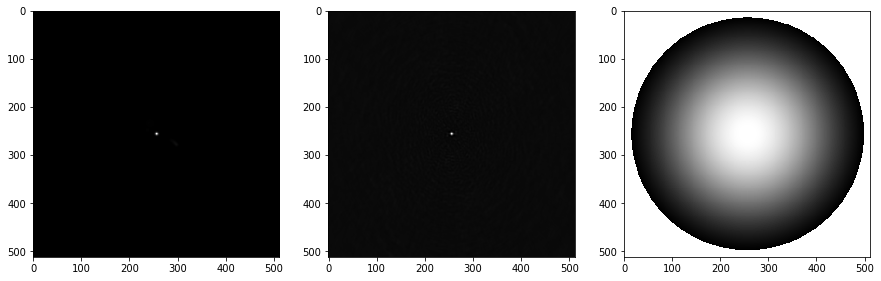

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image_data[0][0], cmap='gray')

plt.subplot(132)
plt.imshow(psf_data[0][0], cmap='gray')

plt.subplot(133)
plt.imshow(flux_data[0][0], cmap='gray')

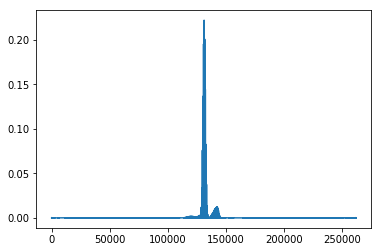

In [8]:
plt.plot(image_data[0][0].flatten())

In [9]:
rmsB6 = 1.92070720004e-05
multp = np.array([3, 3.5, 4.5, 5, 5.5, 6, 10, 20])
lvlB6 = rmsB6*multp

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.372e-04 [aplpy.core]
INFO: Auto-setting vmax to  8.609e-04 [aplpy.core]


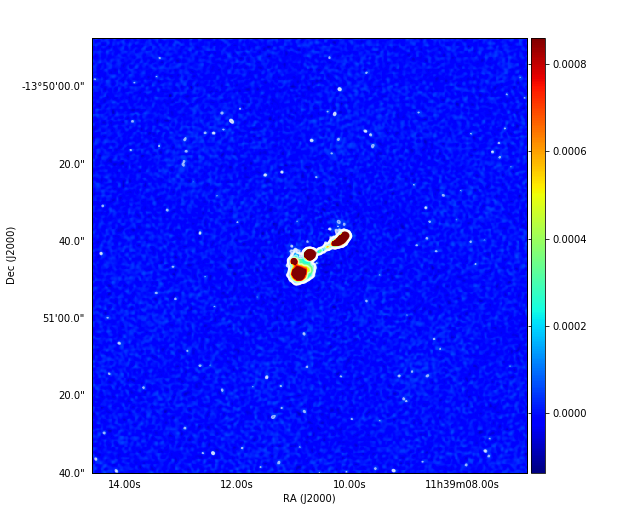

In [10]:
image = aplpy.FITSFigure(image_file)
image.show_colorscale()
image.show_colorbar()
image.show_contour(colors='white', levels=lvlB6, alpha=0.6)

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.092e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.315e-02 [aplpy.core]


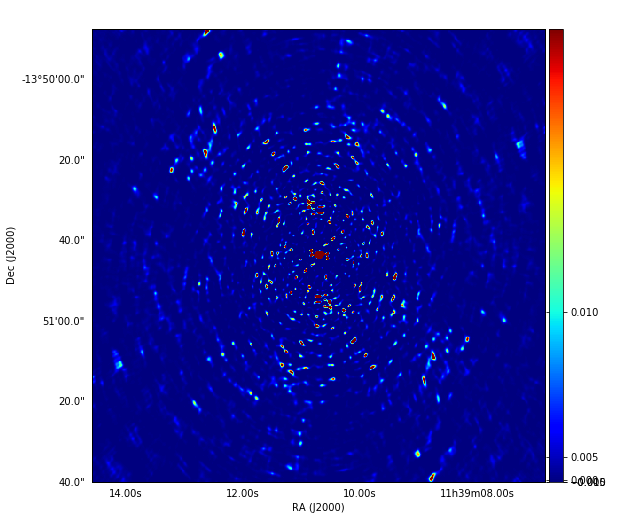

In [11]:
psf = aplpy.FITSFigure(psf_file)
psf.show_colorscale(stretch='power', exponent=7)
psf.show_colorbar()
#psf.show_contour()

# Detected source using sextractor

- threshold = 3 sigma

In [12]:
def read_sexofile(filename = "file.cat"):
    pars = []
    # only get the header
    with open(filename, 'r') as ifile:
        for line in ifile:
            if line[0] == '#': 
                pars.append(line.split()[2])
    print('Col names: ', pars)
    
    # get the data
    data = np.genfromtxt(filename, names=pars) # already in np array
    
    return data

In [13]:
data = read_sexofile("../sextractor-2.19.5_lama/config/J1139-1350.cat")

Col names:  ['NUMBER', 'FLUX_ISO', 'FLUXERR_ISO', 'FLUX_AUTO', 'FLUXERR_AUTO', 'FLUX_BEST', 'FLUXERR_BEST', 'BACKGROUND', 'THRESHOLD', 'FLUX_MAX', 'XMAX_IMAGE', 'YMAX_IMAGE', 'XPEAK_IMAGE', 'YPEAK_IMAGE', 'ALPHAPEAK_J2000', 'DELTAPEAK_J2000', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'ALPHA_J2000', 'DELTA_J2000']


In [14]:
ra, dec, flux = data['ALPHA_J2000'], data['DELTA_J2000'], data['FLUX_MAX']
label = data['NUMBER'].astype('int')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


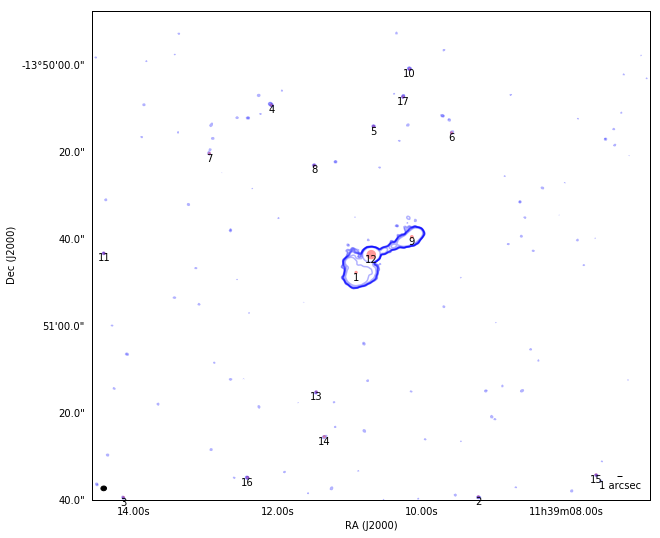

In [15]:
image = aplpy.FITSFigure(image_file)
#image.show_colorscale()#tretch='power', exponent=0.3)
#image.show_colorbar()
image.show_contour(image_file, colors='blue', levels=lvlB6, alpha=0.3)


image.add_beam()
image.beam.set_color('black')
image.add_scalebar(1 * u.arcsecond)
image.scalebar.set_label('1 arcsec')
image.scalebar.set_color("black")

marker_size =  80 * flux/flux.max() + 10
image.show_markers(ra, dec, edgecolor='none', facecolor='red', marker='o', s=marker_size, alpha=0.4)
# primary beam circle
#image.show_circles(center_x, center_y, PB/2.0, edgecolor=['blue', 'green', 'red'])

for i, lbl in enumerate(label): 
    image.add_label(ra[i], dec[i]-0.00032, lbl)

#image.show_colorscale()